In [1]:
# Link repo: https://github.com/facebookresearch/denoiser
!pip install -U denoiser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for denoiser: filename=denoiser-0.1.5-py3-none-any.whl size=43826 sha256=5449dd41d11751d5af9b280c32645ef447835caeee632f40c40949baed4ea496
  Stored in directory: /root/.cache/pip/wheels/f1/57/3f/7ce0ae586d457c598b2cb275a37801ff5a705f656ba7a0215e
  Created wheel for pystoi: filename=pystoi-0.3.3-py2.py3-none-any.whl size=7779 sha256=e0484dcf9804409185834e5532155621e911e351973838c2ebc4e3fb11b7d1ed
  Stored in directory: /root/.cache/pip/wheels/3b/ca/9e/5b5d6e5e109322303b50d21918ad2bd7d50a2a0775c11e08e8
  Created wheel for julius: filename=julius-0.2.7-py3-none-any.whl size=21878 sha256=e3a71e60f11071f29d3c17edc59317

In [2]:
from IPython import display as disp
import torch
import torchaudio
from denoiser import pretrained
from denoiser.dsp import convert_audio

In [3]:
# Downloading a testing file
!wget https://facebookresearch.github.io/denoiser/audio/noisy/alex_noisy.mp3

--2023-07-11 10:20:59--  https://facebookresearch.github.io/denoiser/audio/noisy/alex_noisy.mp3
Resolving facebookresearch.github.io (facebookresearch.github.io)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to facebookresearch.github.io (facebookresearch.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339840 (332K) [audio/mp3]
Saving to: ‘alex_noisy.mp3’

alex_noisy.mp3      100%[===================>] 331.88K  --.-KB/s    in 0.01s   

2023-07-11 10:20:59 (29.0 MB/s) - ‘alex_noisy.mp3’ saved [339840/339840]



In [4]:
model = pretrained.dns64().cuda()
wav, sr = torchaudio.load('alex_noisy.mp3')
wav = convert_audio(wav.cuda(), sr, model.sample_rate, model.chin)
with torch.no_grad():
  denoised = model(wav[None])[0]
disp.display(disp.Audio(wav.data.cpu().numpy(), rate=model.sample_rate))
disp.display(disp.Audio(denoised.data.cpu().numpy(), rate=model.sample_rate))

Downloading: "https://dl.fbaipublicfiles.com/adiyoss/denoiser/dns64-a7761ff99a7d5bb6.th" to /root/.cache/torch/hub/checkpoints/dns64-a7761ff99a7d5bb6.th
100%|██████████| 128M/128M [00:00<00:00, 254MB/s]


## Upload own recordings

In [17]:
from google.colab import files
from IPython.display import display, Audio
import soundfile

uploaded = files.upload()

file_keys = list(uploaded.keys())
file_keys

Saving 332-128985-0073.wav to 332-128985-0073.wav


['332-128985-0073.wav']

In [18]:
wav_own, sr_own = torchaudio.load(file_keys[0])
wav_own = convert_audio(wav_own.cuda(), sr_own, model.sample_rate, model.chin)
with torch.no_grad():
  denoised_own = model(wav_own[None])[0]

display(Audio(wav_own.data.cpu().numpy(), rate=model.sample_rate))
display(Audio(denoised_own.data.cpu().numpy(), rate=model.sample_rate))

In [19]:
# !pip install librosa==0.8.0 #fix: resample() takes 1 positional argument but 3 were given

In [20]:
# https://www.programcreek.com/python/example/95990/soundfile.write
import soundfile as sf

data_denoised = denoised_own.data.cpu().numpy()[0]
sf.write(file_keys[0][:-4] + "_denoised.wav", data_denoised, sr)

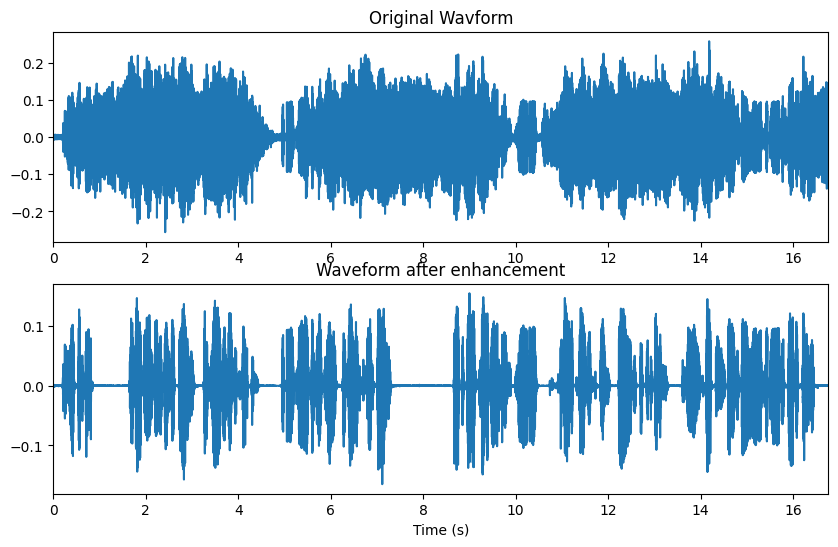

In [22]:
#@title Draw Waveform
import matplotlib.pyplot as plt
import torch

plt.figure(figsize=(10, 6))

data_org = wav_own.data.cpu().numpy()[0]

samples = torch.linspace(0, len(data_org) / sr_own, len(data_org))

plt.subplot(2, 1, 1)
plt.title('Original Wavform')
plt.plot(samples, data_org)
plt.xlim(0, len(data_org) / sr_own)

plt.subplot(2, 1, 2)
plt.title('Waveform after enhancement')
plt.plot(samples, data_denoised)
plt.xlim(0, len(data_denoised) / sr_own)
plt.xlabel("Time (s)")
plt.show()